# GPT2

In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Sample examples with explanations, predictions and scores

In [23]:
#path = '/Users/kenzaamara/Storage/syntax-shap'
path =  '/cluster/work/zhang/kamara/syntax-shap'
save_dir = '/cluster/work/zhang/kamara/syntax-shap'#"/cluster/home/kamara/syntax-shap"

In [3]:
dataset = "rocstories"
model_name = "gpt2"
threshold_ = 0.5
seed_ = 0


#filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
#with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    #stats = pickle.load(f)

#print("Size of the dataset:", stats["n_data"])
#print("Size of filtered dataset:", stats["n_filtered"])
#print("Maximum number of batches:", stats["n_filtered"]//batch_size)

### Performance at thresholds

In [4]:

folder_path = os.path.join(path, f"results/scores/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)

                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                #df['n_token'] = df['token_ids'].apply(len)
                df['threshold'] = eval(threshold)

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,threshold
0,-0.003794,0.008814,0.014761,-0.908976,0.2,0.397103,1038,His friend asked him if he had studied for the,"[His, friend, asked, him, if, he, had, ...","[6653, 1545, 1965, 683, 611, 339, 550, 9713, 3...",svsampling,0.3
1,0.089166,-0.051180,0.098182,0.419543,0.6,0.432718,77,Jeff gets a bad tooth,"[Jeff, gets, a, bad, tooth]","[19139, 3011, 257, 2089, 16162]",svsampling,0.3
2,-0.016308,-0.006504,0.002180,1.381899,0.5,0.406505,632,She rolls all over him and pants a,"[She, rolls, all, over, him, and, pants,...","[3347, 14088, 477, 625, 683, 290, 12581, 257]",svsampling,0.3
3,0.024635,0.024635,0.024635,-10.111958,0.2,0.374325,198,They worked hard on their,"[They, worked, hard, on, their]","[2990, 3111, 1327, 319, 511]",svsampling,0.3
4,0.065105,0.045087,0.065105,-1.179330,0.1,0.376085,2194,He had gotten lost on a hike and now he was wa...,"[He, had, gotten, lost, on, a, hike, an...","[1544, 550, 7891, 2626, 319, 257, 18390, 290, ...",svsampling,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
95647,0.036099,0.036099,0.000000,-10.494045,0.0,0.390212,300,She looked for pads in the,"[She, looked, for, pads, in, the]","[3347, 3114, 329, 21226, 287, 262]",syntax,0.1
95648,0.150495,0.150495,0.000000,-11.921691,0.1,0.544289,43,The house had a gopher,"[The, house, had, a, g, opher]","[464, 2156, 550, 257, 308, 8803]",syntax,0.1
95649,0.122209,0.122209,0.000000,-11.713494,0.0,0.925754,676,He crashed halfway down and rolled to the,"[He, crashed, halfway, down, and, rolled,...","[1544, 14997, 19487, 866, 290, 11686, 284, 262]",syntax,0.1
95650,0.178444,0.178444,0.143083,-12.092037,0.0,0.640919,1917,One day when she was in a hurry she threw some...,"[One, day, when, she, was, in, a, hurry...","[3198, 1110, 618, 673, 373, 287, 257, 23290, 6...",syntax,0.1


In [5]:
df_random = df_final[df_final.algorithm=='random'][['tokens','token_ids','input_id']]
df_final = df_final.drop(['tokens','token_ids'], axis=1)
df_final = pd.merge(df_final, df_random, on='input_id', how='inner')#
df_final['n_token'] = df_final['token_ids'].apply(len)

In [26]:
#df_final = df_final.dropna()
#df = df_final[['algorithm', 'input_id']].drop_duplicates()
##crosstab_df = pd.crosstab(df['input_id'],df['algorithm'])
# Identify complete input_ids
#complete_input_ids = crosstab_df[(crosstab_df == 1).all(axis=1)].index.tolist()
#print(len(complete_input_ids))
#df_final = df_final[df_final['input_id'].isin(complete_input_ids)]

1268


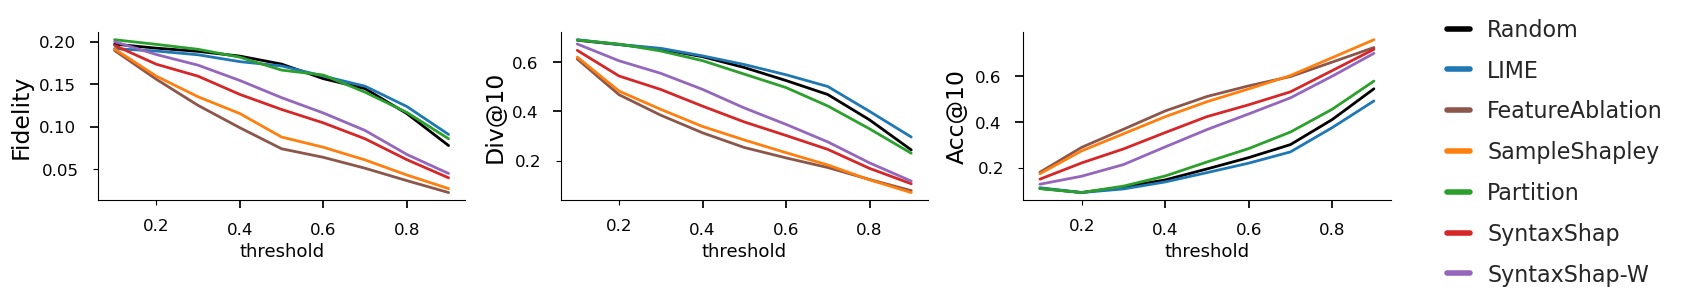

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean(numeric_only=True).reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.2), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend


#fig.suptitle(f'GPT-2, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
plt.tight_layout()
fig.savefig(os.path.join(save_dir, f"figures/{model_name}/{dataset}/scores_{model_name}_{dataset}.pdf"), bbox_inches='tight', dpi=600)
plt.show()

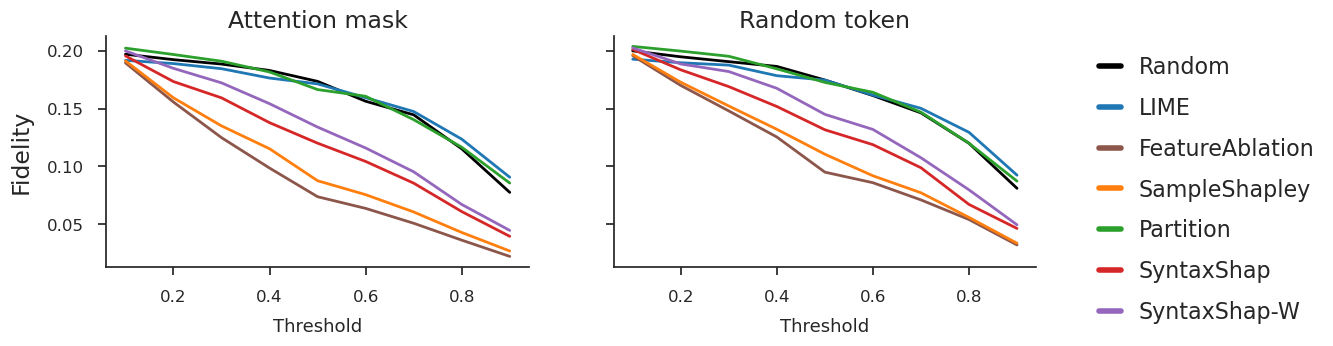

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean(numeric_only=True).reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"]


fig, axes = plt.subplots(1, 2, figsize=(12,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('Attention mask', fontsize=17)
axes[0].set_xlabel('Threshold', fontsize=13, labelpad=10)
axes[0].set_ylabel('Fidelity', fontsize=17, labelpad=10)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('Random token', fontsize=17)
axes[1].set_xlabel('Threshold', fontsize=13, labelpad=10)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

sns.despine()
#plt.tight_layout()

fig.savefig(os.path.join(save_dir, f"figures/{model_name}/{dataset}/masking_{model_name}_{dataset}.pdf"), bbox_inches='tight', dpi=600)
plt.show()

## Statistics analysis

In [8]:

folder_path = os.path.join(path, f"results/scores/{model_name}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if (eval(seed) == seed_) and (eval(threshold) == threshold_):# and (dataset != 'negation'):
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                print(df.head())
                print(df.columns)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['threshold'] = eval(threshold)
                df['dataset'] = dataset

                # Append to the list of dataframes
                df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


   fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0    -0.003494 -0.007456  0.007781       0.671970       0.7        0.162612   
1     0.064726  0.057887  0.064726      -2.247381       0.5        0.110891   
2     0.029249 -0.013927  0.037616       0.314970       0.6        0.196784   
3     0.453871  0.292180  0.453871      -1.032125       0.4        0.422216   
4     0.089345  0.089345  0.089345     -11.400272       0.1        0.557758   

   input_id                       input  \
0       172         A bat flies without   
1       464      A dolphin sees without   
2       196      A monkey walks without   
3       414  Peter is a groom without a   
4       530             A person has no   

                                   tokens                            token_ids  
0             [A,  bat,  flies,  without]              [32, 7365, 17607, 1231]  
1          [A,  dolphin,  sees,  without]              [32, 44136, 7224, 1231]  
2          [A,  monkey,

,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,tokens,token_ids,algorithm,threshold,dataset
0,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",svsampling,0.5,negation
1,0.064726,0.057887,0.064726,-2.247381,0.5,0.110891,464,A dolphin sees without,"[A, dolphin, sees, without]","[32, 44136, 7224, 1231]",svsampling,0.5,negation
2,0.029249,-0.013927,0.037616,0.314970,0.6,0.196784,196,A monkey walks without,"[A, monkey, walks, without]","[32, 21657, 11114, 1231]",svsampling,0.5,negation
3,0.453871,0.292180,0.453871,-1.032125,0.4,0.422216,414,Peter is a groom without a,"[Peter, is, a, groom, without, a]","[19727, 318, 257, 32443, 1231, 257]",svsampling,0.5,negation
4,0.089345,0.089345,0.089345,-11.400272,0.1,0.557758,530,A person has no,"[A, person, has, no]","[32, 1048, 468, 645]",svsampling,0.5,negation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44126,0.430599,0.146281,0.915664,-0.164849,0.3,0.080079,3231,Digital circuits are used for signals that rep...,"[Digital, circuits, are, used, for, signa...","[27640, 24907, 389, 973, 329, 10425, 326, 7830...",syntax,0.5,generics
44127,-0.024990,0.010474,-0.027344,-0.019229,0.4,0.096870,1785,Voltages are compared to the ground to measure,"[V, olt, ages, are, compared, to, the, gr...","[53, 5978, 1095, 389, 3688, 284, 262, 2323, 28...",syntax,0.5,generics
44128,0.679187,0.668382,0.692234,-3.368022,0.4,0.748888,3879,Elephants use their large ears to cool themsel...,"[Ele, ph, ants, use, their, large, ears, ...","[28827, 746, 1187, 779, 511, 1588, 11368, 284,...",syntax,0.5,generics
44129,0.025556,0.017251,0.018728,-0.616648,0.2,0.531921,1302,Infancy is also a time of brain,"[Inf, ancy, is, also, a, time, of, brain]","[18943, 3883, 318, 635, 257, 640, 286, 3632]",syntax,0.5,generics


In [9]:
df_random = df_final[df_final.algorithm=='random'][['tokens','token_ids','input_id']]
df_final = df_final.drop(['tokens','token_ids'], axis=1)
df_final = pd.merge(df_final, df_random, on='input_id', how='inner')#
df_final['n_token'] = df_final['token_ids'].apply(len)

In [38]:
#df_final = df_final.dropna()
#df = df_final[['algorithm', 'input_id']].drop_duplicates()
#crosstab_df = pd.crosstab(df['input_id'],df['algorithm'])
# Identify complete input_ids
#complete_input_ids = crosstab_df[(crosstab_df == 1).all(axis=1)].index.tolist()
#print(len(complete_input_ids))
#df_final = df_final[df_final['input_id'].isin(complete_input_ids)]
#df_final['n_token'] = df_final['tokens'].apply(len)

3442


### Number of tokens

0          0
1          1
2          3
3          4
4          5
        ... 
3567    5361
3568    5368
3569    5370
3570    5373
3571    5388
Name: input_id, Length: 3572, dtype: int64


/tmp/ipykernel_22435/4013934373.py:22: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')


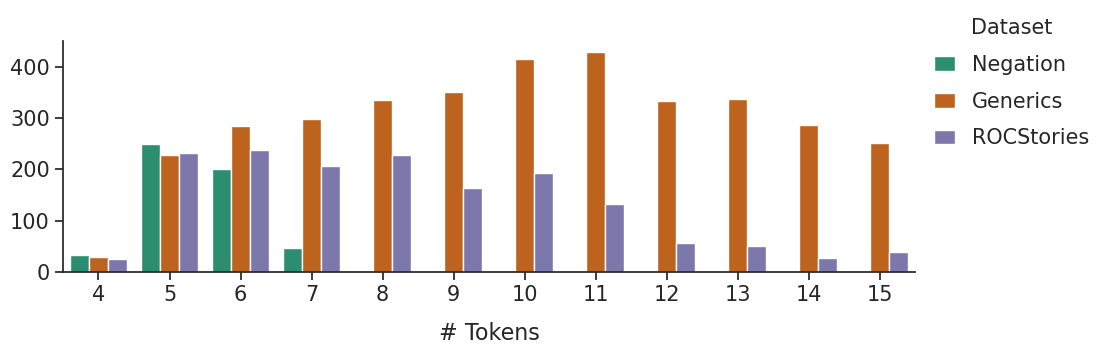

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_final[['input_id', 'input', 'n_token', 'dataset']]
df = df.groupby(['dataset', 'input_id']).mean(numeric_only=True).reset_index()
df['n_token'] = df['n_token'].apply(lambda x: int(x))
print(df[df['dataset'] == 'generics']['input_id'])
order = ['negation', 'generics', 'rocstories']
df = df.sort_values(by='dataset', key=lambda x: x.map({v: i for i, v in enumerate(order)}))
df['dataset'] = df['dataset'].replace({'negation': 'Negation', 'generics': 'Generics', 'rocstories': 'ROCStories'})


# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Plotting
plt.figure(figsize=(11, 3))
sns.countplot(data=df, x='n_token', hue='dataset', palette=sns.color_palette("Dark2"), width=0.8, edgecolor='white')
plt.xlabel('# Tokens', fontsize=16, labelpad=12)
plt.ylabel(None)

legend = plt.legend(title='Dataset', loc='upper left', bbox_to_anchor=(1, 1.18), fontsize=15, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('15')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#plt.legend([],[], frameon=False)
sns.despine()

plt.savefig(os.path.join(save_dir, f"figures/{model_name}/scores_{model_name}_n_token_count.pdf"), bbox_inches='tight', dpi=600)

plt.show()


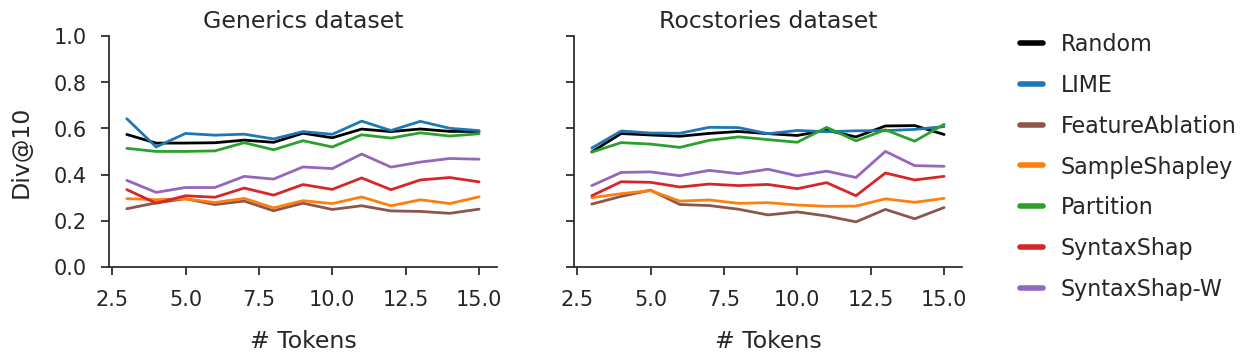

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'n_token']).mean(numeric_only=True).reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


# Creating a lineplot for each score
sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='generics'], ax=axes[0], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[0].set_ylim(0, 1)

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df[df['dataset']=='rocstories'], ax=axes[1], palette=dict_color, linewidth=2)#, errorbar='se')#, err_style='bars')
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel('# Tokens', fontsize=17, labelpad=15)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding
axes[1].set_ylim(0, 1)
# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(os.path.join(save_dir, f"figures/{model_name}/scores_{model_name}_n_tokens_vs_performance.pdf"), bbox_inches='tight', dpi=600)


### Dependency distance

In [12]:
import spacy
import textdescriptives as td


nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('textdescriptives')


def get_dpdcy_dist(text):
    text = str(text)
    doc = nlp(text)
    dd = doc._.dependency_distance['dependency_distance_mean']
    return dd


/cluster/home/kamara/mambaforge/envs/syntaxshapenv/lib/python3.11/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [13]:
df_random = df_final[df_final.algorithm=='random'][['input','input_id']]
df_random['dependency_dist'] = df_random['input'].apply(lambda x: get_dpdcy_dist(x))
df_dpc = pd.merge(df_final, df_random[['input_id', 'dependency_dist']], on='input_id', how='inner')#

In [14]:
df_dpc

,fid_keep_rd,fid_keep,fid_rmv,log_odds_keep,acc_at_k,prob_diff_at_k,input_id,input,algorithm,threshold,dataset,tokens,token_ids,n_token,dependency_dist
0,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,svsampling,0.5,negation,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",4,0.750000
1,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,svsampling,0.5,negation,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",4,0.750000
2,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,svsampling,0.5,negation,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",4,0.750000
3,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,svsampling,0.5,negation,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",4,0.750000
4,-0.003494,-0.007456,0.007781,0.671970,0.7,0.162612,172,A bat flies without,svsampling,0.5,negation,"[A, bat, flies, without]","[32, 7365, 17607, 1231]",4,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152437,0.087979,0.081528,0.037347,-2.612617,0.5,0.283602,3486,Today there are three main areas of focus in a...,syntax,0.5,generics,"[Today, there, are, three, main, areas, ...","[8888, 612, 389, 1115, 1388, 3006, 286, 2962, ...",11,1.363636
1152438,0.087979,0.081528,0.037347,-2.612617,0.5,0.283602,3486,Today there are three main areas of focus in a...,syntax,0.5,generics,"[Today, there, are, three, main, areas, ...","[8888, 612, 389, 1115, 1388, 3006, 286, 2962, ...",11,1.363636
1152439,0.087979,0.081528,0.037347,-2.612617,0.5,0.283602,3486,Today there are three main areas of focus in a...,syntax,0.5,generics,"[Today, there, are, three, main, areas, ...","[8888, 612, 389, 1115, 1388, 3006, 286, 2962, ...",11,1.363636
1152440,0.087979,0.081528,0.037347,-2.612617,0.5,0.283602,3486,Today there are three main areas of focus in a...,syntax,0.5,generics,"[Today, there, are, three, main, areas, ...","[8888, 612, 389, 1115, 1388, 3006, 286, 2962, ...",11,1.363636


In [20]:
df_final = df_dpc

In [31]:
#df_dpc.to_csv(os.path.join(save_dir, f"dependency_dist/scores_{model_name}_{threshold_}_seed{seed_}.csv"), index=False)

In [77]:
df_final = pd.read_csv(os.path.join(save_dir, f"dependency_dist/scores_{model_name}_{threshold_}_seed{seed_}.csv"))

/tmp/ipykernel_22435/1920672467.py:35: UserWarning: 
The palette list has fewer values (6) than needed (850) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='generics'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
/tmp/ipykernel_22435/1920672467.py:41: UserWarning: 
The palette list has fewer values (6) than needed (692) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='rocstories'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ig

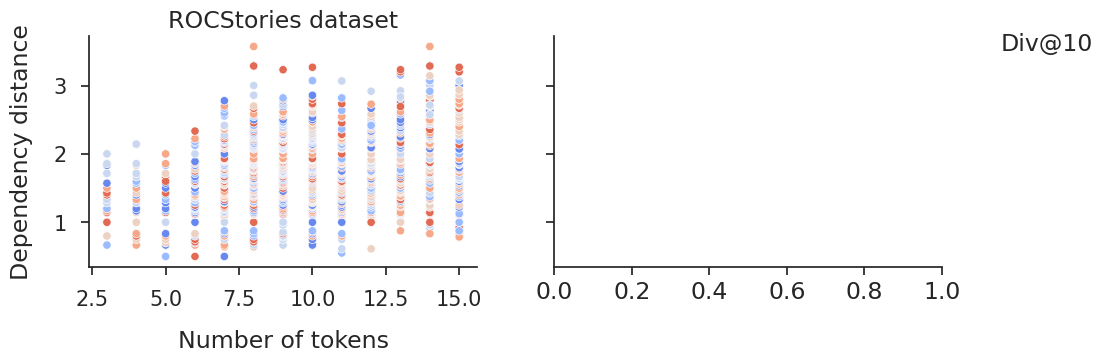

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'dataset', 'dependency_dist', 'n_token']).mean().reset_index()
df = df[df['dataset'] != 'negation']
df = df[df['n_token'] <= 15]


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'HEDGE', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "HEDGE": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "HEDGE", "SyntaxShap", "SyntaxShap-W"]


df = df[df['algorithm']=='SyntaxShap']

fig, axes = plt.subplots(1, 2, figsize=(11,3), sharey=True)

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})


sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='generics'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel('Number of tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Dependency distance', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

sns.scatterplot(x='n_token', y='dependency_dist', hue='prob_diff_at_k', data=df[df['dataset']=='rocstories'], ax=axes[0], palette=sns.color_palette('coolwarm'))#, errorbar='se')#, err_style='bars')
axes[0].set_title('ROCStories dataset', fontsize=17)
axes[0].set_xlabel('Number of tokens', fontsize=17, labelpad=15)
axes[0].set_ylabel('Dependency distance', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=15, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

legend = axes[1].legend(title='Div@10', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size

#fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

#fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/scores_{model_name}_dependency_dist_vs_performance.pdf", bbox_inches='tight', dpi=600)


In [18]:
df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()

3.0

bins_generics [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max generics dpdc dist:  3
bins_rocstories [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max rocstories dpdc dist:  3


/tmp/ipykernel_22435/787865757.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
/tmp/ipykernel_22435/787865757.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
/tmp/ipykernel_22435/787865757.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

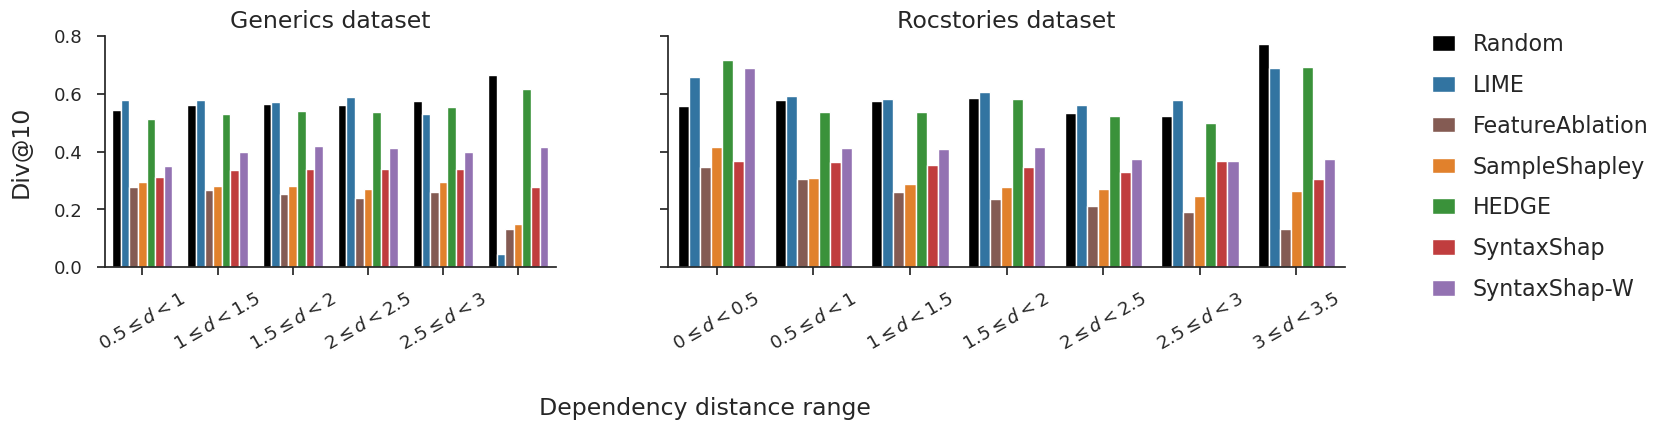

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration

# Define bins for each dataset independently
bins_generics = [x / 2 for x in range(1, int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max() * 2) + 1)]
bins_rocstories = [x / 2 for x in range(0, int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max() * 2) + 1)]
print('bins_generics', bins_generics)
print('max generics dpdc dist: ', int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()))
print('bins_rocstories', bins_rocstories)
print('max rocstories dpdc dist: ', int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max()))


# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df = df_final.copy()
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'HEDGE', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "HEDGE": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "HEDGE", "SyntaxShap", "SyntaxShap-W"]


# Create bins for each dataset
df_generics = df[df['dataset'] == 'generics']
df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
df_generics = df_generics.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

df_rocstories = df[df['dataset'] == 'rocstories']
df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
df_rocstories = df_rocstories.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,3), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})

# Creating a lineplot for each score
sns.barplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_generics, ax=axes[0], palette=dict_color)
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[0].set_ylim(0, 0.8)
axes[0].tick_params(axis='x', rotation=30) 

sns.barplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_rocstories, ax=axes[1], palette=dict_color)
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[1].tick_params(axis='x', rotation=30) 

# Change x-axis labels
axes[0].set_xticklabels([r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$'])
axes[1].set_xticklabels([r'$0\leq d<0.5$', r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$', r'$3\leq d<3.5$'])

fig.supxlabel("Dependency distance range", fontsize=17, x=0.5, y=-0.4)

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')

sns.despine()
fig.savefig(os.path.join(save_dir, f"figures/{model_name}/scores_{model_name}_dependency_dist_bins.pdf"), bbox_inches='tight', dpi=600)
plt.show()


bins_generics [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max generics dpdc dist:  3
bins_rocstories [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
max rocstories dpdc dist:  3


/tmp/ipykernel_22435/2568949118.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
/tmp/ipykernel_22435/2568949118.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
/tmp/ipykernel_22435/2568949118.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

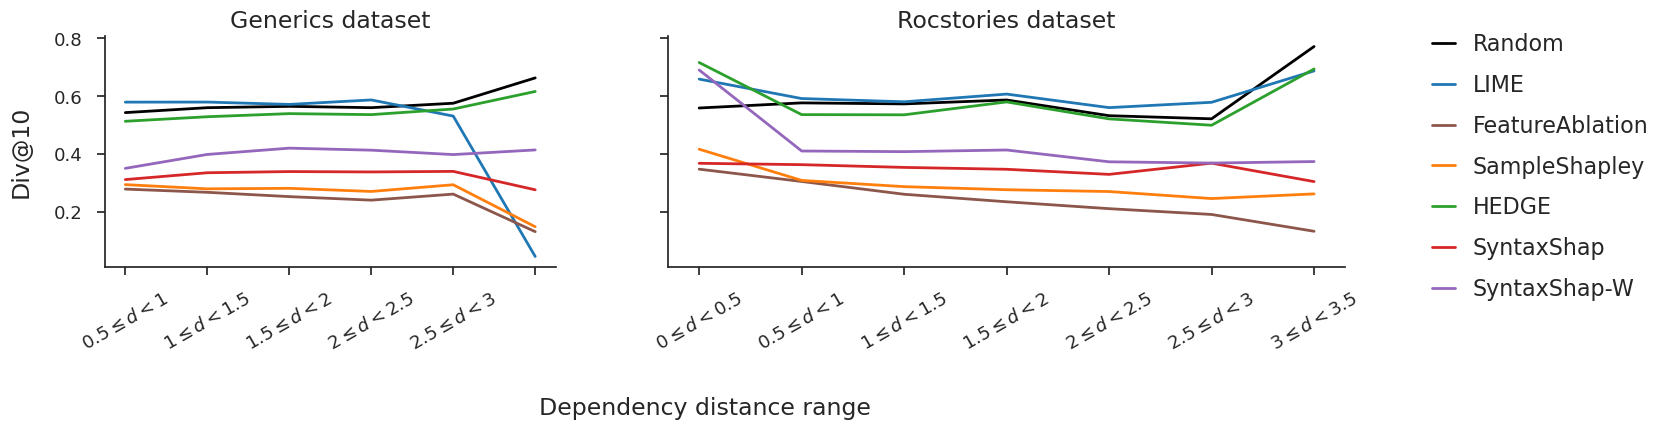

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration

# Define bins for each dataset independently
bins_generics = [x / 2 for x in range(1, int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max() * 2) + 1)]
bins_rocstories = [x / 2 for x in range(0, int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max() * 2) + 1)]
print('bins_generics', bins_generics)
print('max generics dpdc dist: ', int(df_final[df_final['dataset'] == 'generics']['dependency_dist'].max()))
print('bins_rocstories', bins_rocstories)
print('max rocstories dpdc dist: ', int(df_final[df_final['dataset'] == 'rocstories']['dependency_dist'].max()))

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "ablation", "svsampling", "hedge", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df = df_final.copy()
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'ablation': 'FeatureAblation', 'svsampling': 'SampleShapley', 'hedge': 'HEDGE', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "SampleShapley": pal[1], "HEDGE": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4], "FeatureAblation": pal[5]} 

legend_order = ["Random", "LIME", "FeatureAblation","SampleShapley", "HEDGE", "SyntaxShap", "SyntaxShap-W"]

# Create bins for each dataset
df_generics = df[df['dataset'] == 'generics']
df_generics['dependency_dist_bin'] = pd.cut(df_generics['dependency_dist'], bins=bins_generics)
df_generics = df_generics.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

df_rocstories = df[df['dataset'] == 'rocstories']
df_rocstories['dependency_dist_bin'] = pd.cut(df_rocstories['dependency_dist'], bins=bins_rocstories)
df_rocstories = df_rocstories.groupby(['algorithm', 'dataset', 'dependency_dist_bin']).mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16,3), sharey=True, gridspec_kw={'width_ratios': [1, 1.5]})

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 17, "ytick.labelsize" : 17})

# Creating a lineplot for each score
df_generics['dependency_dist_bin'] = df_generics['dependency_dist_bin'].astype(str)
sns.lineplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_generics, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('Generics dataset', fontsize=17)
axes[0].set_xlabel(None)
axes[0].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=13, pad=10)
#axes[0].set_ylim(0.2, 0.8)
axes[0].tick_params(axis='x', rotation=30) 

df_rocstories['dependency_dist_bin'] = df_rocstories['dependency_dist_bin'].astype(str)
sns.lineplot(x='dependency_dist_bin', y='prob_diff_at_k', hue='algorithm', data=df_rocstories, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('Rocstories dataset', fontsize=17)
axes[1].set_xlabel(None)
axes[1].set_ylabel('Div@10', fontsize=17, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=13, pad=10)
axes[1].tick_params(axis='x', rotation=30) 

# Change x-axis labels
axes[0].set_xticklabels([r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$'])
axes[1].set_xticklabels([r'$0\leq d<0.5$', r'$0.5\leq d<1$', r'$1\leq d<1.5$', r'$1.5\leq d<2$', r'$2\leq d<2.5$', r'$2.5\leq d<3$', r'$3\leq d<3.5$'])

fig.supxlabel("Dependency distance range", fontsize=17, x=0.5, y=-0.4)

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[1].legend(ordered_handles, ordered_labels, title='', loc='upper left', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')

sns.despine()
fig.savefig(os.path.join(save_dir, f"figures/{model_name}/scores_{model_name}_dependency_dist_lineplot.pdf"), bbox_inches='tight', dpi=600)
plt.show()
